In [42]:
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib inline

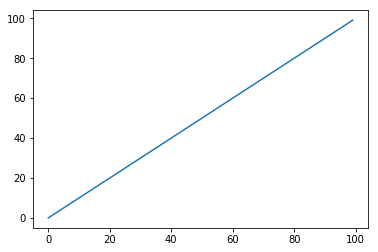

In [46]:
a = np.asarray(range(100))
plt.figure(0)
plt.plot(a)
plt.show()

# CODE

In [52]:
mean_01 = np.array([3.0,4.0])

cov_01 = np.array([[1.0,-0.5],[-0.5,1.0]])

mean_02 = np.array([0.0,0.0])

cov_02 = np.array([[1.0,0.5],[0.5,0.6]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,200)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)

print(dist_01.shape)
print(dist_02.shape)

(200, 2)
(200, 2)


In [10]:
#print(dist_01)

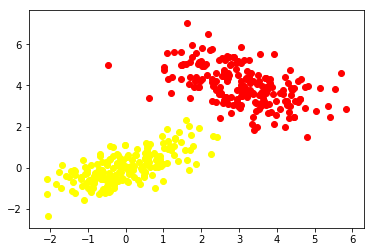

In [53]:
plt.figure(0)

for x in range(dist_01.shape[0]):
    plt.scatter(dist_01[x,0],dist_01[x,1],color='red')
    plt.scatter(dist_02[x,0],dist_02[x,1],color='yellow')
plt.show()

# Training Data Preparation

In [54]:
labels = np.zeros((400,1))
labels[200:] = 1.0

X_data = np.zeros((400,2))
X_data[:200,:]=dist_01
X_data[200:,:]=dist_02

#print(X_data)
#print(labels)

# KNN ALGORITHM

In [28]:
def dist(x1,x2):
    return np.sqrt(((x1-x2)**2).sum())

In [55]:
def knn(X_train,query_point,y_train,k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [dist(query_point,X_train[ix,:]),y_train[ix]]
        vals.append(v)
        # vals is the list containing distances and thier labels
    updated_vals = sorted(vals)
    
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:,1],return_counts = True)
    index = pred_arr[1].argmax()  #index of largest frequency
    return  pred_arr[0][index]

q = np.array([4.0,0.0])
predicted_label = knn(X_data,q,labels)
print(predicted_label)

0.0


## 